In [1]:
import requests 
import pandas as pd
import numpy 
import seaborn as sns
import matplotlib.pyplot as plt
print("done")

done


In [4]:
df_2024_03 = pd.read_csv("Crimes_Port_2024_03")
df_2024_02 = pd.read_csv("Crimes_Port_2024_02")
df_2024_01 = pd.read_csv("Crimes_Port_2024_01")
df_2023_12 = pd.read_csv("Crimes_Port_2023_12")
df_2023_11 = pd.read_csv("Crimes_Port_2023_11")
df_2023_10 = pd.read_csv("Crimes_Port_2023_10")

In [5]:
dfs = [df_2024_03, df_2024_02, df_2024_01, df_2023_12, df_2023_11, df_2023_10]
final_df = pd.concat(dfs, ignore_index=True)

In [14]:
final_df.sample(10)
final_df.rename(columns={"month": "date"}, inplace=True)
final_df.head()

,category,location_type,location,outcome_status,id,date
0,anti-social-behaviour,Force,Jacob's Street,None,117597222,2024-03-01
1,anti-social-behaviour,Force,Willis Road,None,117597514,2024-03-01
2,anti-social-behaviour,Force,Old Star Place,None,117597555,2024-03-01
3,anti-social-behaviour,Force,Surrey Street,None,117597554,2024-03-01
4,anti-social-behaviour,Force,Westminster Place,None,117597039,2024-03-01


In [98]:
cat_date = pd.DataFrame(final_df.groupby('date')['category'].value_counts())
cat_date.rename(columns={"category": "count"}, inplace=True)

# Get top 5 categories for each date
cat_date = cat_date.groupby('date').apply(lambda x: x.nlargest(5, 'count'))
cat_date.reset_index(0, inplace=True)
cat_date.drop(columns="date", axis=1)

count
date       category                    
2023-10-01 violent-crime            392
           anti-social-behaviour     98
           public-order              95
           shoplifting               86
           vehicle-crime             81
2023-11-01 violent-crime            396
           shoplifting              116
           anti-social-behaviour     93
           public-order              78
           vehicle-crime             74
2023-12-01 violent-crime            397
           public-order              83
           anti-social-behaviour     82
           criminal-damage-arson     75
           shoplifting               58
2024-01-01 violent-crime            406
           criminal-damage-arson     80
           public-order              80
           shoplifting               71
           anti-social-behaviour     68
2024-02-01 violent-crime            436
           shoplifting               86
           public-order              84
           anti-social-behaviour     77
           criminal-damage-arson     61
2024-03-01 violent-crime            403
           shoplifting              116
           public-order              79
           anti-social-behaviour     78
           criminal-damage-arson     59

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'violent-crime'),
  Text(1, 0, 'anti-social-behaviour'),
  Text(2, 0, 'public-order'),
  Text(3, 0, 'shoplifting'),
  Text(4, 0, 'vehicle-crime'),
  Text(5, 0, 'criminal-damage-arson')])

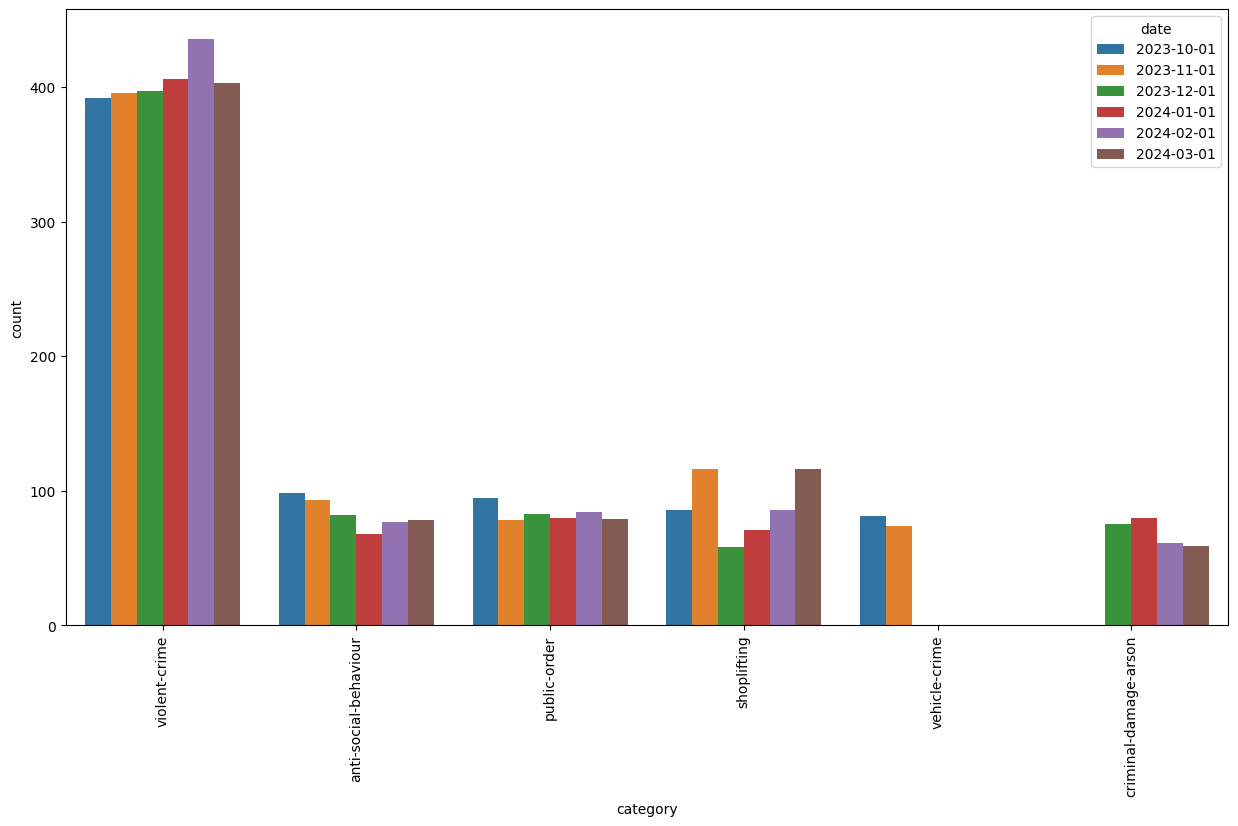

In [99]:
plt.figure(figsize=(15,8))
sns.barplot(data=cat_date, x="category", y="count", hue="date")
plt.xticks(rotation=90)

In [101]:
# there is clearly a high amount of violent crime cases and towards the end of the year there appears to be an increase in the amount of vehicle crime
# key take away is that I as an analyst need to be more methodical with what data I use so I can gain more actional insights 

loc_date = pd.DataFrame(final_df.groupby('date')['location'].value_counts())
loc_date.rename(columns={"location": "count"}, inplace=True)

# Get top 5 categories for each date
loc_date = loc_date.groupby('date').apply(lambda x: x.nlargest(5, 'count'))
loc_date.reset_index(0, inplace=True)
loc_date.drop(columns="date", axis=1)

count
date       location                                   
2023-10-01  Parking Area                            88
            Supermarket                             67
            Guildhall Walk                          31
            Shopping Area                           26
            Further/higher Educational Building     21
2023-11-01  Parking Area                            95
            Supermarket                             58
            Jacob's Street                          30
            Guildhall Walk                          27
            Kingswell Street                        19
2023-12-01  Parking Area                            67
            Supermarket                             42
            Further/higher Educational Building     19
            Guildhall Walk                          19
            Surrey Street                           17
2024-01-01  Parking Area                            76
            Supermarket                             39
            Henrietta Place                         21
            Guildhall Walk                          20
            Shopping Area                           20
2024-02-01  Parking Area                            72
            Supermarket                             36
            Guildhall Walk                          19
            Jacob's Street                          18
            Further/higher Educational Building     16
2024-03-01  Parking Area                            72
            Supermarket                             55
            Guildhall Walk                          32
            Jacob's Street                          29
            Shopping Area                           21

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ' Parking Area'),
  Text(1, 0, ' Supermarket'),
  Text(2, 0, ' Guildhall Walk'),
  Text(3, 0, ' Shopping Area'),
  Text(4, 0, ' Further/higher Educational Building'),
  Text(5, 0, " Jacob's Street"),
  Text(6, 0, ' Kingswell Street'),
  Text(7, 0, ' Surrey Street'),
  Text(8, 0, ' Henrietta Place')])

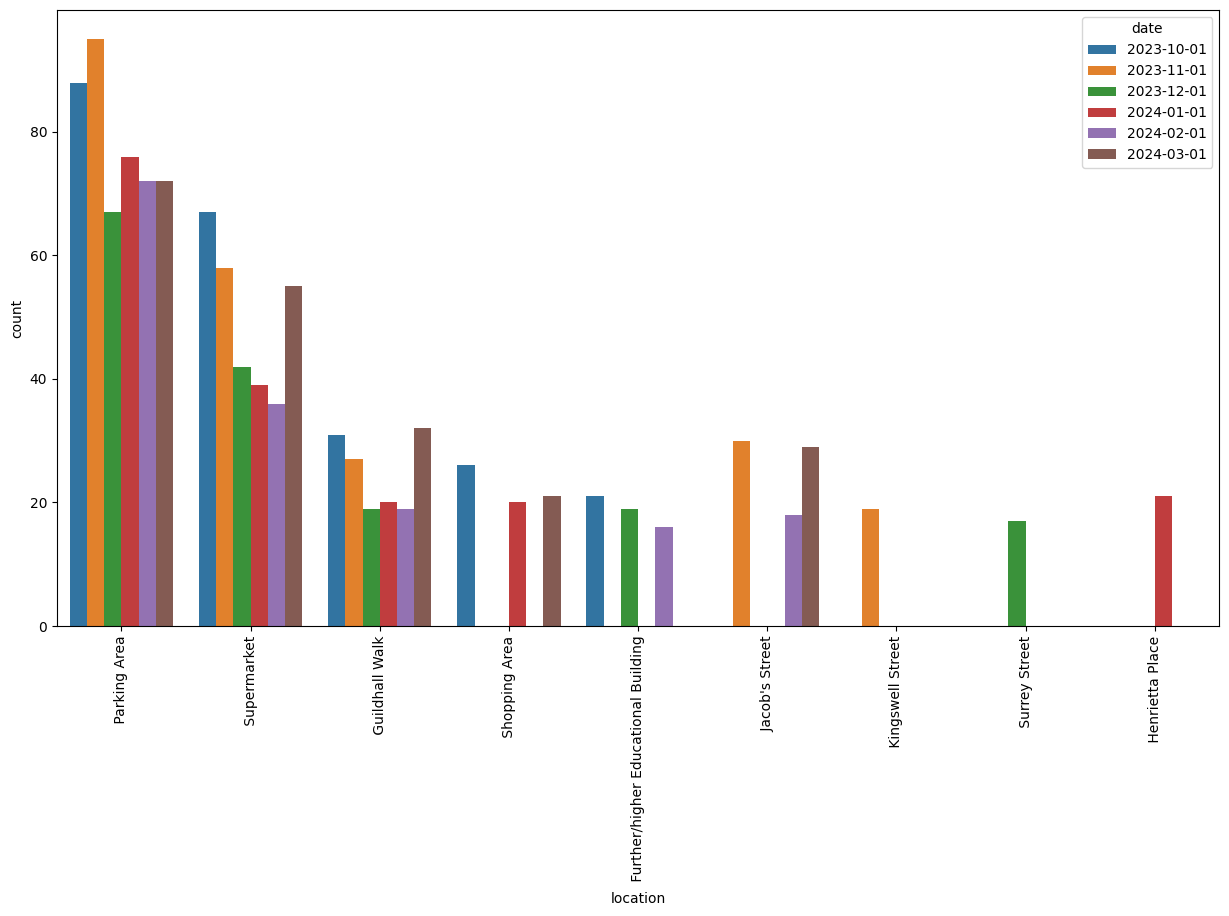

In [102]:
plt.figure(figsize=(15,8))
sns.barplot(data=loc_date, x="location", y="count", hue="date")
plt.xticks(rotation=90)

In [ ]:
# trend for decrease in parking area crime over last 6 months, supermarket, parking and guildhall walk crime spiking for 2024-03, may want to increaase respuces to jacob's street?
# note this data may be inaccurate for this kind of analysis as this is not necessarily the date that the crime was commited.

# key take away - the crime category of 'violent crime' and the locations of 'parking areas' and 'supermarkets' should be priritised by force. 